In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:/Users/vaibh/Downloads/Task 3 and 4_Loan_Data.csv" # <- your path

df = pd.read_csv(file_path)

# View the first few rows and get summary info
print(df.head())
print(df.info())


   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 

In [2]:
df.head(10)


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
5,4661159,0,5376.886873,7189.121298,85529.84591,2,697,0
6,8291909,1,3634.057471,7085.980095,68691.57707,6,722,0
7,4616950,4,3302.172238,13067.570210,50352.16821,3,545,1
8,3395789,0,2938.325123,1918.404472,53497.37754,4,676,0
9,4045948,0,5396.366774,5298.824524,92349.55399,2,447,0


In [3]:
df.isnull().sum()


customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [5]:
df['default'].value_counts(normalize=True)
#0 = No Default
#The borrower did not default on the loan.

#1 = Default
#The borrower did default on the loan.

default
0    0.8149
1    0.1851
Name: proportion, dtype: float64

In [6]:
df.dtypes


customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [11]:
print(df.columns)


Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')


In [12]:
df = pd.get_dummies(df, drop_first=True)


In [13]:
df.select_dtypes(include='object').columns


Index([], dtype='object')

In [14]:
#Train/Test split

In [15]:
X = df.drop(columns='default')
y = df['default']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train the model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [19]:
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (default)

# Evaluate performance
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))
print(classification_report(y_test, y_pred_probs > 0.5))


ROC AUC Score: 0.9999900514010943
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1630
           1       0.98      1.00      0.99       370

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [21]:
def expected_loss(prob_default, loan_amount, recovery_rate=0.10):
    return prob_default * loan_amount * (1 - recovery_rate)


In [23]:
print(X_test.columns)


Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score'],
      dtype='object')


In [24]:
# Predict probabilities for test set
y_test_probs = logreg.predict_proba(X_test_scaled)[:, 1]
loan_amounts = X_test['loan_amt_outstanding'].values  # Use the correct column here

# Compute expected loss
expected_losses = y_test_probs * loan_amounts * 0.9  # 90% loss given default

# Wrap into a DataFrame
import pandas as pd

results_df = pd.DataFrame({
    'PD': y_test_probs,
    'LoanAmount': loan_amounts,
    'ExpectedLoss': expected_losses
})

print(results_df.head())


             PD   LoanAmount  ExpectedLoss
0  8.514549e-14  3751.658863  2.874932e-10
1  2.524579e-04  4377.267759  9.945682e-01
2  1.976473e-09  4921.822166  8.755066e-06
3  3.041844e-10  3606.449724  9.873233e-07
4  4.026557e-10  2441.035518  8.846072e-07


In [25]:
def calculate_expected_loss(model, scaler, borrower_data, loan_amount, recovery_rate=0.10):
    """
    borrower_data: 1-row DataFrame with same structure as training data
    loan_amount: float
    """
    X_scaled = scaler.transform(borrower_data)
    prob_default = model.predict_proba(X_scaled)[0][1]
    el = prob_default * loan_amount * (1 - recovery_rate)
    return prob_default, el


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import pandas as pd

# Step 1: Train the Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)  # no scaling needed for Random Forest

# Step 2: Predict and evaluate
y_rf_probs = rf.predict_proba(X_test)[:, 1]
y_rf_preds = rf.predict(X_test)

print(" Random Forest ROC AUC:", roc_auc_score(y_test, y_rf_probs))
print(" Classification Report:\n", classification_report(y_test, y_rf_preds))

# Step 3: Compute Expected Loss
loan_amounts = X_test['loan_amt_outstanding'].values
rf_expected_loss = y_rf_probs * loan_amounts * 0.9

# Step 4: Build results DataFrame
rf_results_df = pd.DataFrame({
    'PD': y_rf_probs,
    'LoanAmount': loan_amounts,
    'ExpectedLoss': rf_expected_loss
})

# Step 5: Display results
print("\n First 5 Predictions with Expected Loss:")
print(rf_results_df.head())

print("\n Total Expected Loss (Test Set): ₹", round(rf_results_df['ExpectedLoss'].sum(), 2))


 Random Forest ROC AUC: 0.9998258995191511
 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.99      0.99       370

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000


 First 5 Predictions with Expected Loss:
         PD   LoanAmount  ExpectedLoss
0  0.000000  3751.658863      0.000000
1  0.000000  4377.267759      0.000000
2  0.000000  4921.822166      0.000000
3  0.000741  3606.449724      2.405188
4  0.002137  2441.035518      4.693948

 Total Expected Loss (Test Set): ₹ 1497037.47


In [29]:
#visualizing 

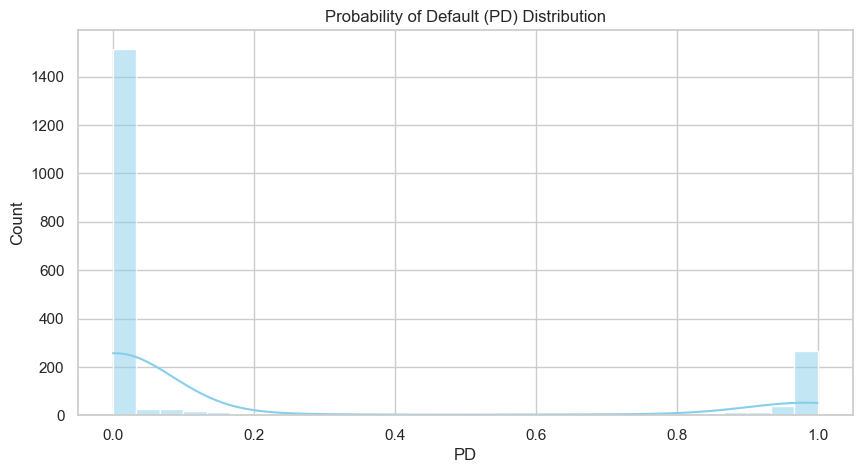

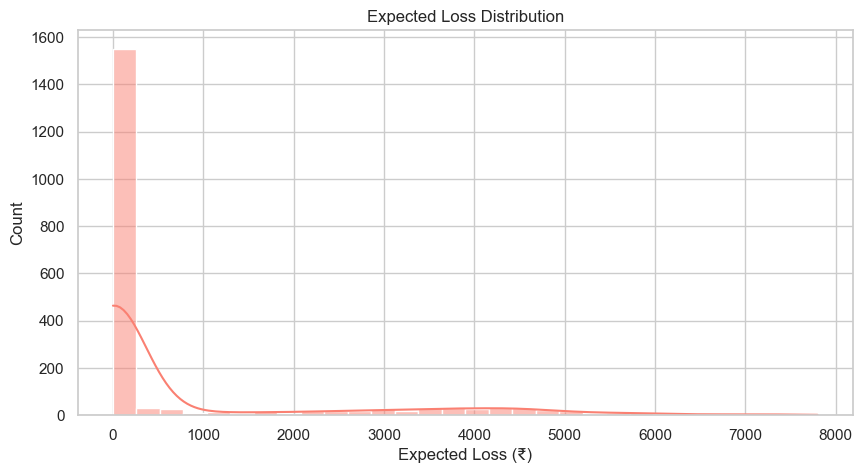

C:\Users\vaibh\AppData\Local\Temp\ipykernel_9708\907068947.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExpectedLoss', y=top_loss_df.index, data=top_loss_df, palette='viridis')


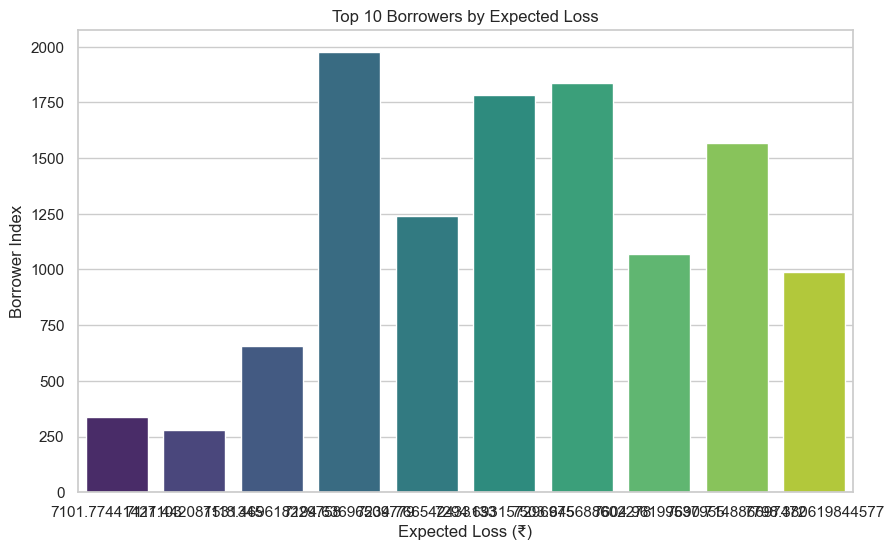

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Histogram of PD
plt.figure(figsize=(10, 5))
sns.histplot(rf_results_df['PD'], bins=30, color='skyblue', kde=True)
plt.title('Probability of Default (PD) Distribution')
plt.xlabel('PD')
plt.ylabel('Count')
plt.show()

# 2. Histogram of Expected Loss
plt.figure(figsize=(10, 5))
sns.histplot(rf_results_df['ExpectedLoss'], bins=30, color='salmon', kde=True)
plt.title('Expected Loss Distribution')
plt.xlabel('Expected Loss (₹)')
plt.ylabel('Count')
plt.show()

# 3. Top 10 Borrowers by Expected Loss
top_loss_df = rf_results_df.sort_values(by='ExpectedLoss', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='ExpectedLoss', y=top_loss_df.index, data=top_loss_df, palette='viridis')
plt.title('Top 10 Borrowers by Expected Loss')
plt.xlabel('Expected Loss (₹)')
plt.ylabel('Borrower Index')
plt.show()


In [31]:
pip install streamlit


2025-08-26 11:01:04.930 
  command:

    streamlit run C:\Users\vaibh\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

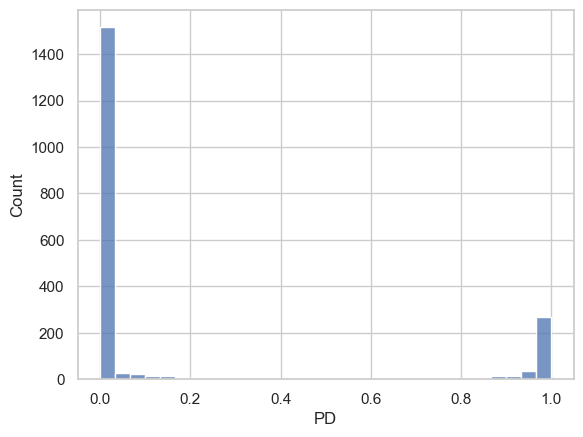

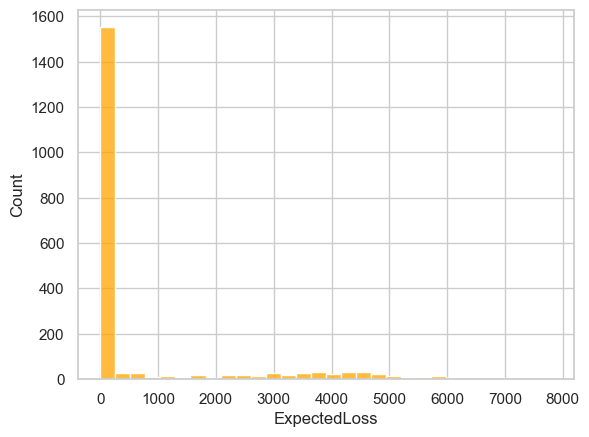

In [32]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load results
df = rf_results_df.copy()

st.title("Credit Risk Analysis Dashboard")

st.subheader("1. Distribution of Probability of Default")
fig1, ax1 = plt.subplots()
sns.histplot(df['PD'], bins=30, ax=ax1)
st.pyplot(fig1)

st.subheader("2. Distribution of Expected Loss")
fig2, ax2 = plt.subplots()
sns.histplot(df['ExpectedLoss'], bins=30, ax=ax2, color='orange')
st.pyplot(fig2)

st.subheader("3. Top 10 Borrowers by Expected Loss")
top10 = df.sort_values('ExpectedLoss', ascending=False).head(10)
st.dataframe(top10)


SyntaxError: invalid syntax (507122745.py, line 1)